In [1]:
# You may add additional imports here
import random
import matplotlib.pyplot as plt
import csv

Question 1
==========

All parts of Question 1 use the _point-a-rally (PARS) scoring_ system.

**Question 1a:** Complete the following function so that it implements the PARS algorithm from the coursework specification.

**[Functionality: 7 marks]**

In [2]:
def game(ra, rb):
    A_score = 0 
    B_score = 0
    Probability_A = ra / (ra + rb)
    x = False
    while x == False:
        r = random.random()
        if r < Probability_A:
            A_score = A_score + 1
            if (A_score >= 11 and A_score - B_score >= 2):
                return (A_score, B_score)
            elif (B_score >= 11 and B_score - A_score >= 2):
                return (A_score, B_score)
            else:
                x = False  
        else:
            B_score = B_score + 1
            if (A_score >= 11 and A_score - B_score >= 2):
                return (A_score, B_score)
            elif (B_score >= 11 and B_score - A_score >= 2):
                return (A_score, B_score)
            else:
                x = False

**Testing:** If the random seed is set to 57, then calling the function with arguments `70` and `30` should return `(11,5)`.

In [3]:
random.seed(57)
print(game(70, 30))

(11, 5)


**Question 1b:** Complete the following function `win_probability_game(ra, rb, simulations)` to simulate `simulations` games in order to estimate the probability that a player with ability `ra` will win a game against a player of ability `rb`.

**[Functionality: 4 marks]**

In [4]:
def win_probability_game(ra, rb, simulations=1000):
    Win_A = 0
    Win_B = 0
    for i in range(0,simulations):
        single_simulation = game(ra, rb)
        if single_simulation[0] > single_simulation[1]:
            Win_A = Win_A + 1
        else:
            Win_B = Win_B + 1
    return(Win_A / (Win_A + Win_B))


**Testing:** Given sufficient simulations, calling the function with abilities `70` and `30` should give the answer `0.98` when printed to 2 decimal places.

In [5]:

random.seed(57)
print(round(win_probability_game(70, 30), 2))


0.98


**Question 1c:** Assume players abilities are given in a csv file with the format:
```
player a ability, player b ability,
60, 20,
100, 55,
50, 40,
20, 70,
95, 85,
```
Complete the following function to read in a specified csv file of this format and return a `list` of `tuple`s containing each pair of abilities.

**[Functionality: 4 marks]**

In [6]:
def read_abilities(csv_file):
    with open(csv_file, 'r') as file:
        csvfile = csv.reader(file)
        next(csvfile)
        new_list = []
        for row in csvfile:
            x = tuple((int(row[0]),int(row[1])))
            new_list.append(x)
        return new_list

**Testing:** Calling the function to read the file `test.csv` from Learning Central should return `[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]`

In [7]:
# Print the result of calling the function for the file `test.csv`
read_abilities("test.csv")

[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]

**Question 1d:** Write a function that takes a `list` of the format returned by your answer to 1c as an argument, and uses `matplotlib` to produce a plot (with labelled axes) showing the probability that player a beats player b (in a game) against `ra / r_b` for each pair.

**[Functionality: 5 marks]**

In [8]:

def plot_win_probabilities(reading_list):
    lst_a_wins = []
    lst_rarb_total = []
    for i in range(len(reading_list)):
        ra = (reading_list[i])[0]
        rb = (reading_list[i])[1]
        total = ra/rb
        probability_a_wins = (round(win_probability_game(ra, rb), 2))
        lst_a_wins.append(probability_a_wins)
        lst_rarb_total.append(total)     
    plt.plot(lst_rarb_total, lst_a_wins,  'bo')
    plt.axis([0, 3.0, 0, 1.0])
    plt.xlabel("ra/rb")
    plt.ylabel("probability a wins")
    plt.show()

**Testing:** The following figure (or similar) should result from the data `[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]'

<img src="./win_probabilities.png" alt="Win probabilities" width="500">


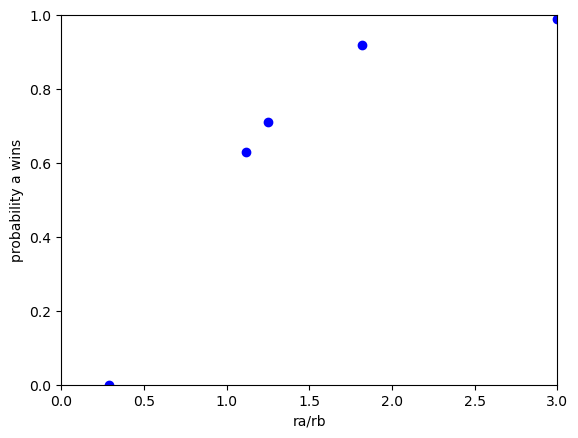

In [9]:
# Call the function to plot the figure here
plot_win_probabilities(read_abilities("test.csv"))

**Question 1e:** Complete the following function `win_probability_match(ra, rb, simulations, m)` to simulate `simulations` matches which are won by the first player to win `m` games, and returns an estimate of the probability that a player with ability `ra` will win such a match against a player of ability `rb`.

Provide code that works out the smallest value of `m` such that `win_probability_match(60, 40, simulations, m)` is at least `0.9`. 

_HINT: make sure you use an appropriate value for `simulations`._

**[Functionality: 5 marks]**

In [10]:
def match(ra, rb, m):
    #Scoreboard for matches [player_A, player_B, total_matches]
    played_m = [0, 0, 0]
    #while loop that checks if any player reached the winning number of matches and if not increments one player's score randomly
    while played_m[0] < m and played_m[1] < m:
        single_simulation = game(ra, rb)
        if single_simulation[0] > single_simulation[1]:
            played_m[0] = played_m[0] + 1
            played_m[2] = played_m[2] + 1
        else:
            played_m[1] = played_m[1] + 1
            played_m[2] = played_m[2] + 1
    return(played_m[0], played_m[1], played_m[2])

In [11]:
def win_probability_match(ra, rb, simulations, m):
    expected_win_A = 0
    expected_win_B = 0
    total_matches = 0
    for i in range(0, simulations):
        match_1 = match(ra, rb, m)
        if match_1[0] > match_1[1]:
            expected_win_A = expected_win_A + 1
            total_matches = total_matches + 1
        elif match_1[1] > match_1[0]:
            expected_win_B = expected_win_B + 1
            total_matches = total_matches + 1
        else: 
            total_matches = total_matches + 1
    return (expected_win_A / (expected_win_B + expected_win_A))


ans = 0
matches_for_smallest_value_of_m = 1
while ans < 0.9:
    ans = win_probability_match(60, 40, 10000, matches_for_smallest_value_of_m)
    matches_for_smallest_value_of_m = matches_for_smallest_value_of_m + 1
print (matches_for_smallest_value_of_m - 1)



2


Question 2
==========

Complete the remaining template of a scientific report that uses the results of simulation (with suitable input data) to investigate whether English or PARS is the ``better'' scoring method for squash matches. 

You should clearly state any assumptions you make, and may add any number of code cells. Guidance for completing the markdown/text cells is given in the coursework specification. The word count of the remaining markdown/text cells must be at most 750.

Your investigation should consider the relative ability of the two players (i.e. `ra/rb`) as the _independent variable_ and include appropriate figures that show how your choice of relevant _dependent variable_ varies. Your results **must** cover at least 50 different values of `ra/rb`.

Some starting points you may consider:
- How _fair_ is the scoring method - does the better player usually win?
- Shorter matches are usually preferable (e.g. for television) - if you assume each rally in a match takes equal time, how long do matches typically last?
- What effect does the relative ability of the two players have?

**[Report: 7 marks; Achievement: 8 marks]**

In [12]:
def game_eng(ra, rb):
    A_score = 0 
    B_score = 0
    round_win_A = 0
    round_win_B = 0
    Probability_A = ra / (ra + rb)
    ra_position = "server"
    winning_score = 9
    minimum_passing_score = 8
    choice_of_random = random.random()
    while not(A_score == winning_score) and not(B_score == winning_score):
        if (A_score == 8 and B_score == 8) and choice_of_random < 0.5:
            minimum_passing_score = 100
            winning_score = 9
            r = random.random()
            if ra_position == "server":
                if r < Probability_A: 
                    A_score = A_score + 1
                    round_win_A = round_win_A + 1
                else:
                    ra_position = "returner"
                    round_win_B = round_win_B + 1
            else:
                if r < Probability_A: 
                    ra_position = "server"
                    round_win_A = round_win_A + 1
                else:
                    B_score = B_score + 1
                    round_win_B = round_win_B + 1
        elif (A_score == 8 and B_score == 8) and choice_of_random >= 0.5:
            minimum_passing_score = 100
            winning_score = 10
            r = random.random()
            if ra_position == "server":
                if r < Probability_A: 
                    A_score = A_score + 1
                    round_win_A = round_win_A + 1
                else:
                    ra_position = "returner"
                    
                    round_win_B = round_win_B + 1
            else:
                if r < Probability_A: 
                    ra_position = "server"
                    round_win_A = round_win_A + 1
                else:
                    B_score = B_score + 1
                    round_win_B = round_win_B + 1
        else:
            r = random.random()
            if ra_position == "server":
                if r < Probability_A: 
                    A_score = A_score + 1
                    round_win_A = round_win_A + 1
                else:
                    ra_position = "returner"
                    round_win_B = round_win_B + 1
            else:
                if r < Probability_A: 
                    ra_position = "server"
                    round_win_A = round_win_A + 1
                else:
                    B_score = B_score + 1
                    round_win_B = round_win_B + 1
    return(A_score, B_score, round_win_A + round_win_B)





In [13]:
def game_pars(ra, rb):
    A_score = 0 
    B_score = 0
    Probability_A = ra / (ra + rb)
    x = False
    while x == False:
        r = random.random()
        if r < Probability_A:
            A_score = A_score + 1
            if (A_score >= 11 and A_score - B_score >= 2):
                return (A_score, B_score, A_score + B_score)
            elif (B_score >= 11 and B_score - A_score >= 2):
                return (A_score, B_score, A_score + B_score)
            else:
                x = False  
        else:
            B_score = B_score + 1
            if (A_score >= 11 and A_score - B_score >= 2):
                return (A_score, B_score, A_score + B_score)
            elif (B_score >= 11 and B_score - A_score >= 2):
                return (A_score, B_score, A_score + B_score)
            else:
                x = False



In [14]:
#Calculating game avarage for pars
def game_avr_pars(avg, ra, rb):
    avarage_val = 0
    for x in range(0, avg):
        avarage_val = avarage_val + (game_pars(ra, rb)[2])
    return round((avarage_val/avg), 1)


In [15]:
#Calculating game avarage for english
def game_avr_eng(avg, ra, rb):
    avarage_val = 0
    for x in range(0, avg):
        avarage_val = avarage_val + (game_eng(ra, rb)[2])
    return round((avarage_val/avg), 1)


In [16]:
def avg_ra_wins_eng(ra, rb, avg=20000):
    ra_wins = 0
    rb_wins = 0
    for i in range(0, avg):
        single_game = game_eng(ra, rb)
        if single_game[0] > single_game[1]:
            ra_wins = ra_wins + 1
        else:
            rb_wins = rb_wins + 1
    return ra_wins / (ra_wins + rb_wins)

          

In [17]:
def avg_ra_wins_pars(ra, rb, avg=20000):
    ra_wins = 0
    rb_wins = 0
    for i in range(0, avg):
        single_game = game_pars(ra, rb)
        if single_game[0] > single_game[1]:
            ra_wins = ra_wins + 1
        else:
            rb_wins = rb_wins + 1
    return ra_wins / (ra_wins + rb_wins)



SCIENTIFIC REPORT FOR SQUASH SCORING METHODS ENGLISH AND PARS

## Problem

There are two popular scoring methods for squash games one being English scoring while the other being Pars (Point-a-rally scoring). And for both of these scoring methods, there are different problems. I am going to investigate whether Pars or English scoring is the better scoring. I am going to use two different parameters to check the better scoring one being the fairness of the scoring and the other being length of an actual match. I will be increasing the probability of one player to see if the better player wins with a higher probability and how will this affect the average time. I expect a better player to win with a high probability while time will increase.

## Method

I will be running two simulations one for investigating the fairness of scoring by comparing the probability of a player winning the game by looking at average wins that increase with each step compared with an ability of that over the total ability of two players. And the other simulation will be about the average game played with the increasing ability of one player. I will measure the ability of both players from the range 0 to 100 for both simulations. And there will be 20000 simulations for all scoring methods and simulations which will help me get more accurate results and graphs.

## Assumptions

Before starting to get the results and graphs I first assumed that players do not have any mood changes before or in the game and two players have the same mood. And I have also assumed that each match that is simulated takes the same time. I have made these assumptions since they are harder to measure.

## Results

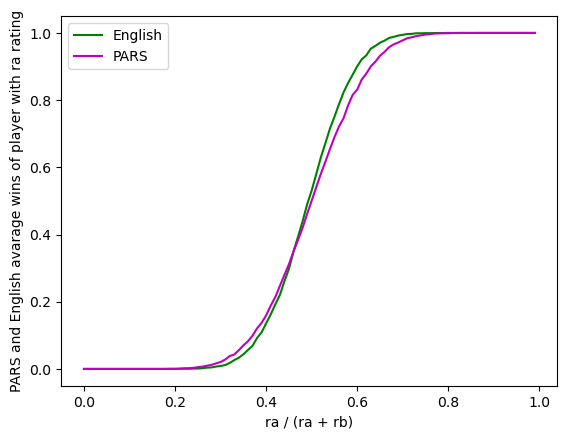

In [18]:
# Avarage wins of ra over (ra + rb) takes some time to load
list_of_avg_ra_wins_eng = []
list_of_avg_ra_wins_pars = []
list_of_ra_pars_and_eng = []
for i in range(0, 100):
    list_of_avg_ra_wins_eng.append(avg_ra_wins_eng(0 + i, 100 - i))
    list_of_avg_ra_wins_pars.append(avg_ra_wins_pars(0 + i, 100 - i))
    list_of_ra_pars_and_eng.append((0 + i) / ((0 + i) + (100 - i)))

plt.plot(list_of_ra_pars_and_eng, list_of_avg_ra_wins_eng, color='g', label='English')   
plt.plot(list_of_ra_pars_and_eng, list_of_avg_ra_wins_pars,  color='m', label='PARS')   
plt.xlabel("ra / (ra + rb)")
plt.ylabel("PARS and English avarage wins of player with ra rating")
plt.legend()
plt.show()

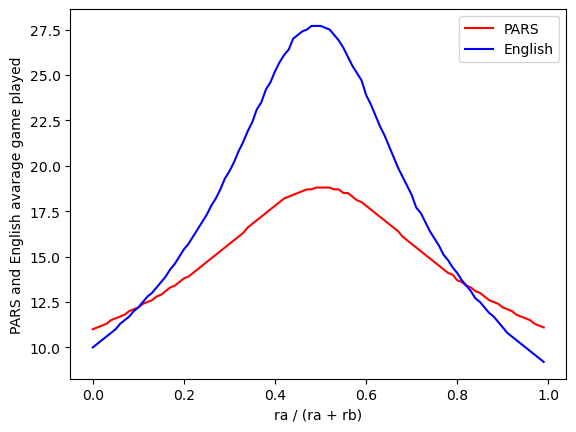

In [19]:
# Avarage time taken for each scoring takes some time to load
list_for_pars_avg = []
list_for_eng_avg = []
list_for_ra_pars_and_eng = []

for i in range(0, 100):
    list_for_pars_avg.append(game_avr_pars(20000, 0 + i, 100 - i))
    list_for_eng_avg.append(game_avr_eng(20000, 0 + i, 100 - i))
    list_for_ra_pars_and_eng.append((0 + i) / ((0 + i) + (100 - i)))

plt.plot(list_for_ra_pars_and_eng, list_for_pars_avg, color='r', label='PARS')   
plt.plot(list_for_ra_pars_and_eng, list_for_eng_avg, color='b', label='English')   
plt.xlabel("ra / (ra + rb)")
plt.ylabel("PARS and English avarage game played")
plt.legend()
plt.show()


The results show that English scoring is slightly better compared to PARS for rewarding the player with higher ability, while PARS scoring is shorter compared to English.

## Conclusions

To play shorter matches (for TV or in crowded stadiums) the players need to agree on the PARS scoring method so that spectators will not be bored with long matches. To play better-scored matches players need to agree on English scoring since it gives a better idea of who the player with better ability could be used for tournaments since it is fairer. Overall English scoring would be preferred for professional players since it is a better choice for players with higher rankings.